In [ ]:
!nvidia-smi

%pip install ultralytics


Tue Mar 11 00:50:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   30C    P0             42W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
import ultralytics

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 39.4/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.11.11
Install             pip
Path                /usr/local/lib/python3.11/dist-packages/ultralytics
RAM                 83.48 GB
Disk                39.4/112.6 GB
CPU                 Intel Xeon 2.20GHz
CPU count           12
GPU                 NVIDIA A100-SXM4-40GB, 40507MiB
GPU count           1
CUDA                12.4

numpy               ✅ 1.26.4<=2.1.1,>=1.23.0
matplotlib          ✅ 3.10.0>=3.3.0
opencv-python       ✅ 4.11.0.86>=4.6.0
pillow              ✅ 11.1.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.5.1+cu124>=1.8.0
torch               ✅ 2.5.1+cu124!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.20.1+cu124

In [ ]:
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
ultralytics.checks()

Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 39.4/112.6 GB disk)


In [ ]:
!pip install roboflow

from roboflow import Roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.3/83.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 34.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key="Ym1IvaJmMhRLF9KtY6gK")

workspace = rf.workspace("navigationofindoor")
project = rf.workspace("navigationofindoor").project("indoor-map")
version = project.version(20)
dataset = version.download("yolov11")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov11 in progress : 85.0%
Version export complete for yolov11 format



Extracting Dataset Version Zip to Indoor-map-20 in yolov11:: 100%|██████████| 560/560 [00:00<00:00, 3617.80it/s]


In [ ]:
!pip install wandb --upgrade

import wandb
wandb.login()

True

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=300 imgsz=960 plots=True

/content
Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolo11x.pt, data=/content/datasets/Indoor-map-20/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=960, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

In [ ]:
!ls /content/runs/detect/train5

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch4640.jpg
confusion_matrix.png				    R_curve.png       train_batch4641.jpg
events.out.tfevents.1741655069.8f67b6738a6f.6324.0  results.csv       train_batch4642.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


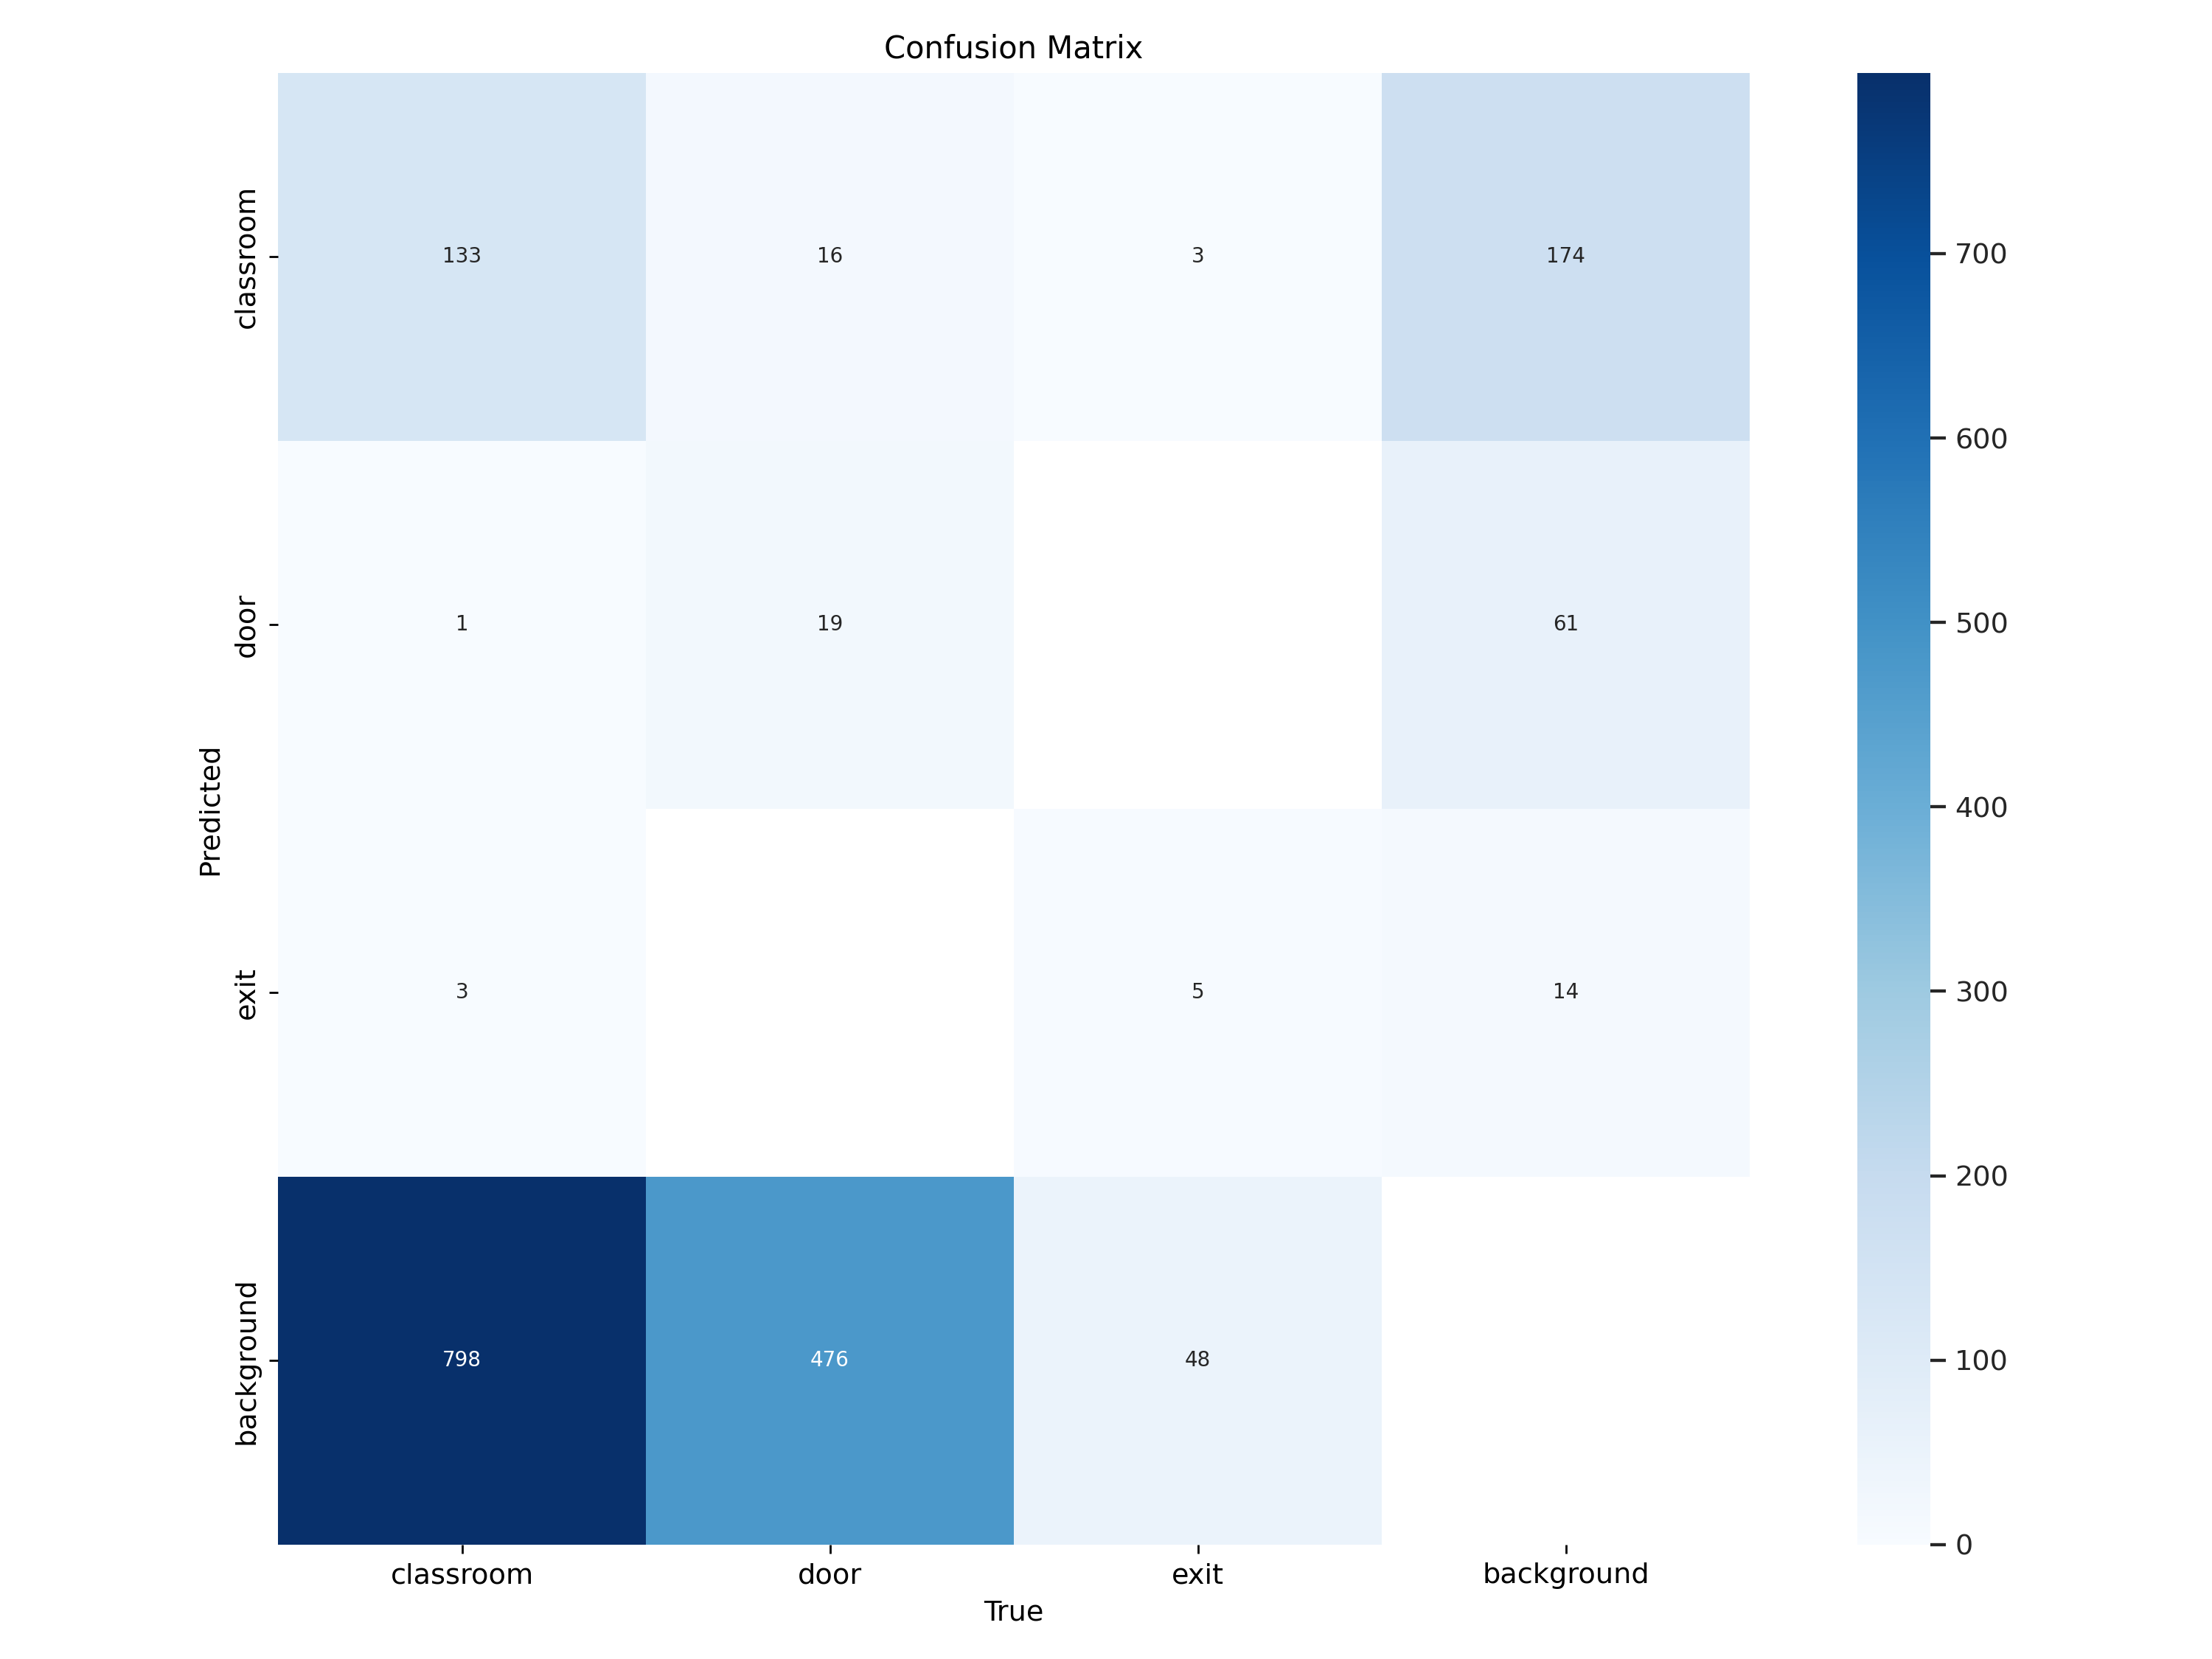

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/runs/detect/train5/confusion_matrix.png', width=600)

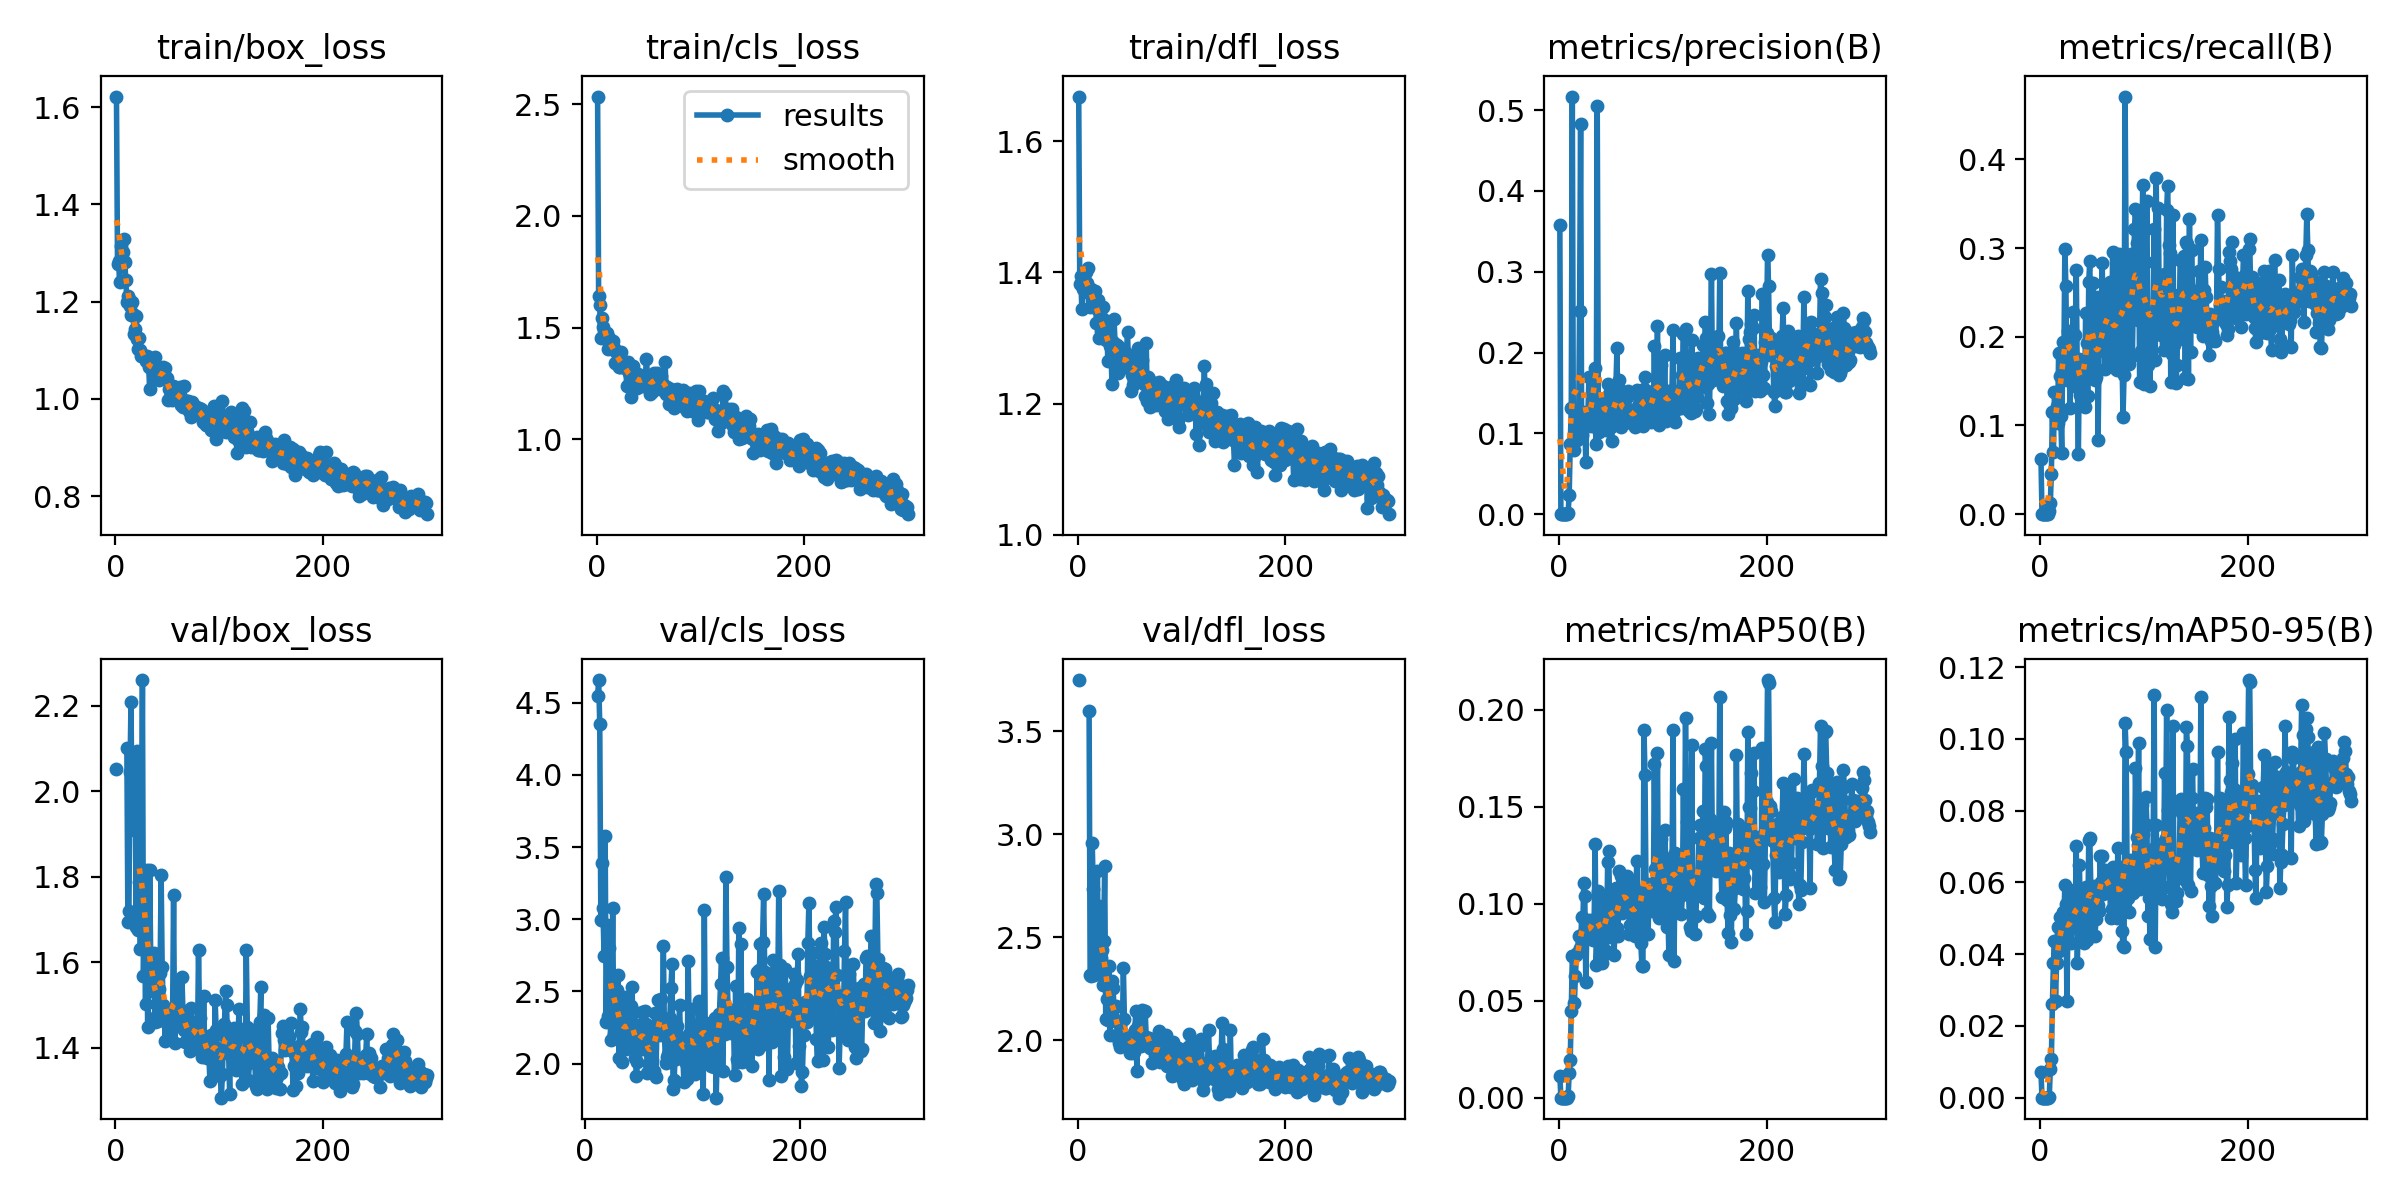

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train5/results.png', width=2048)

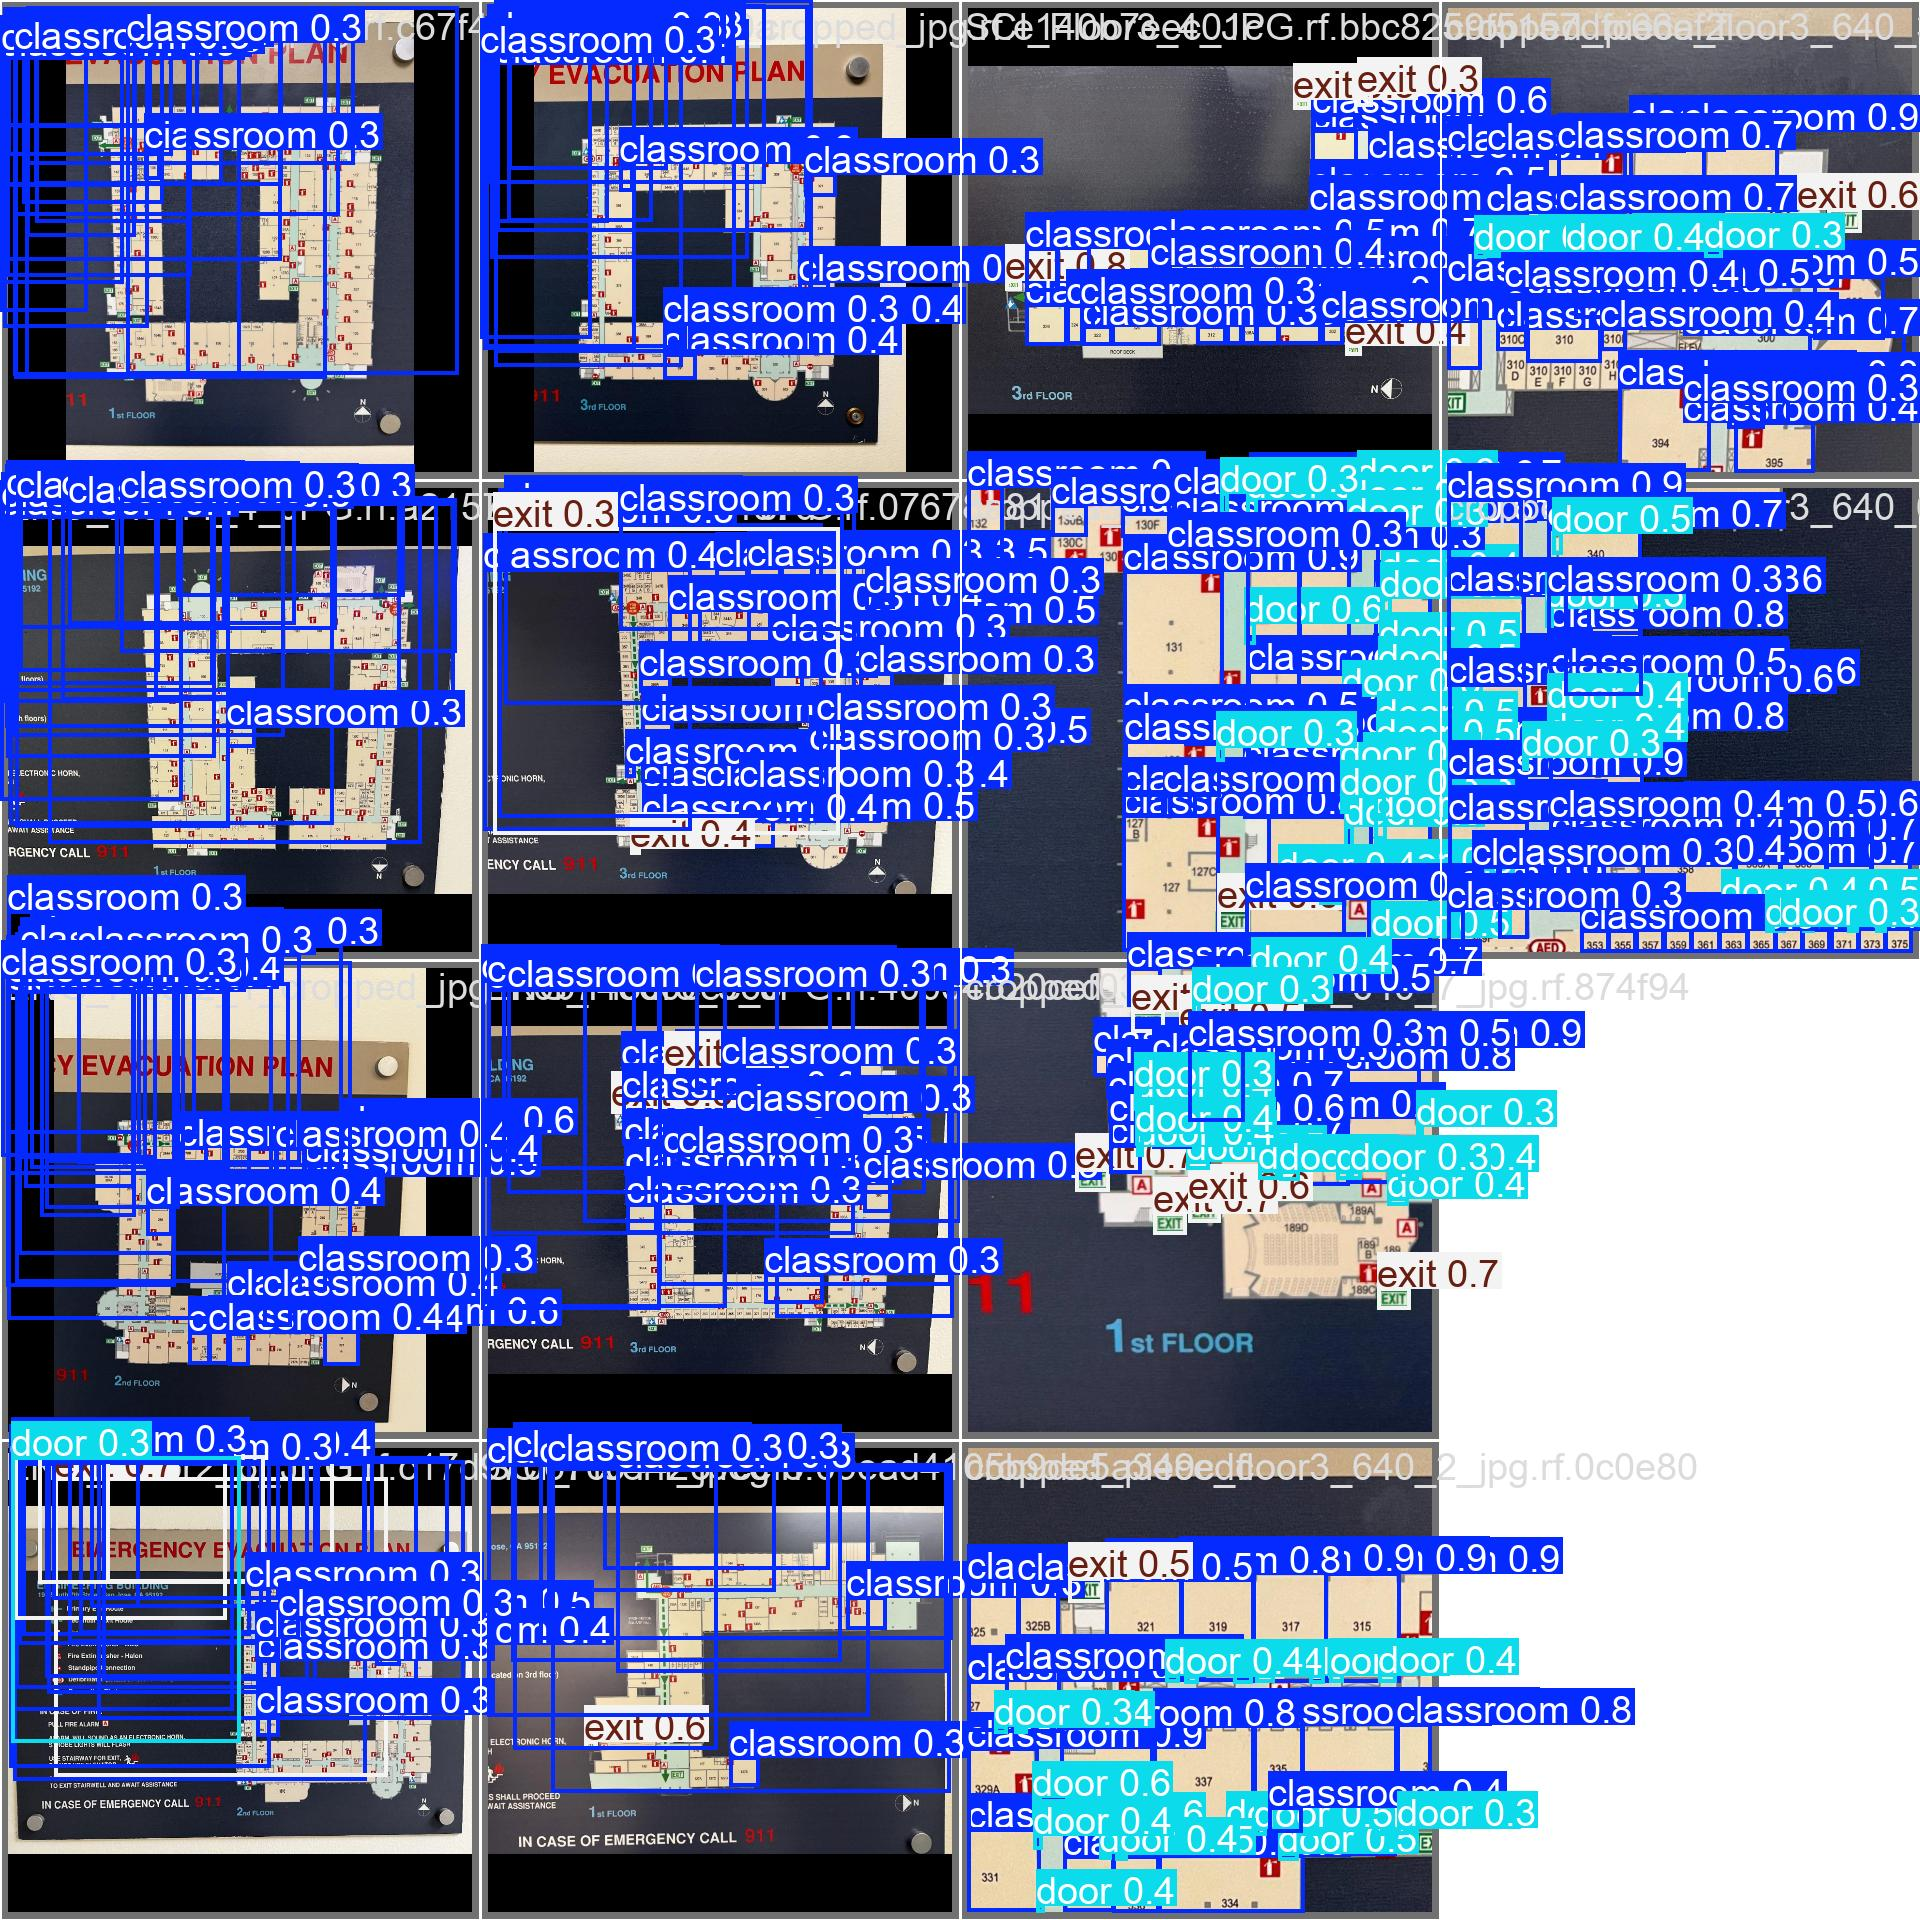

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train5/val_batch0_pred.jpg', width=3000)

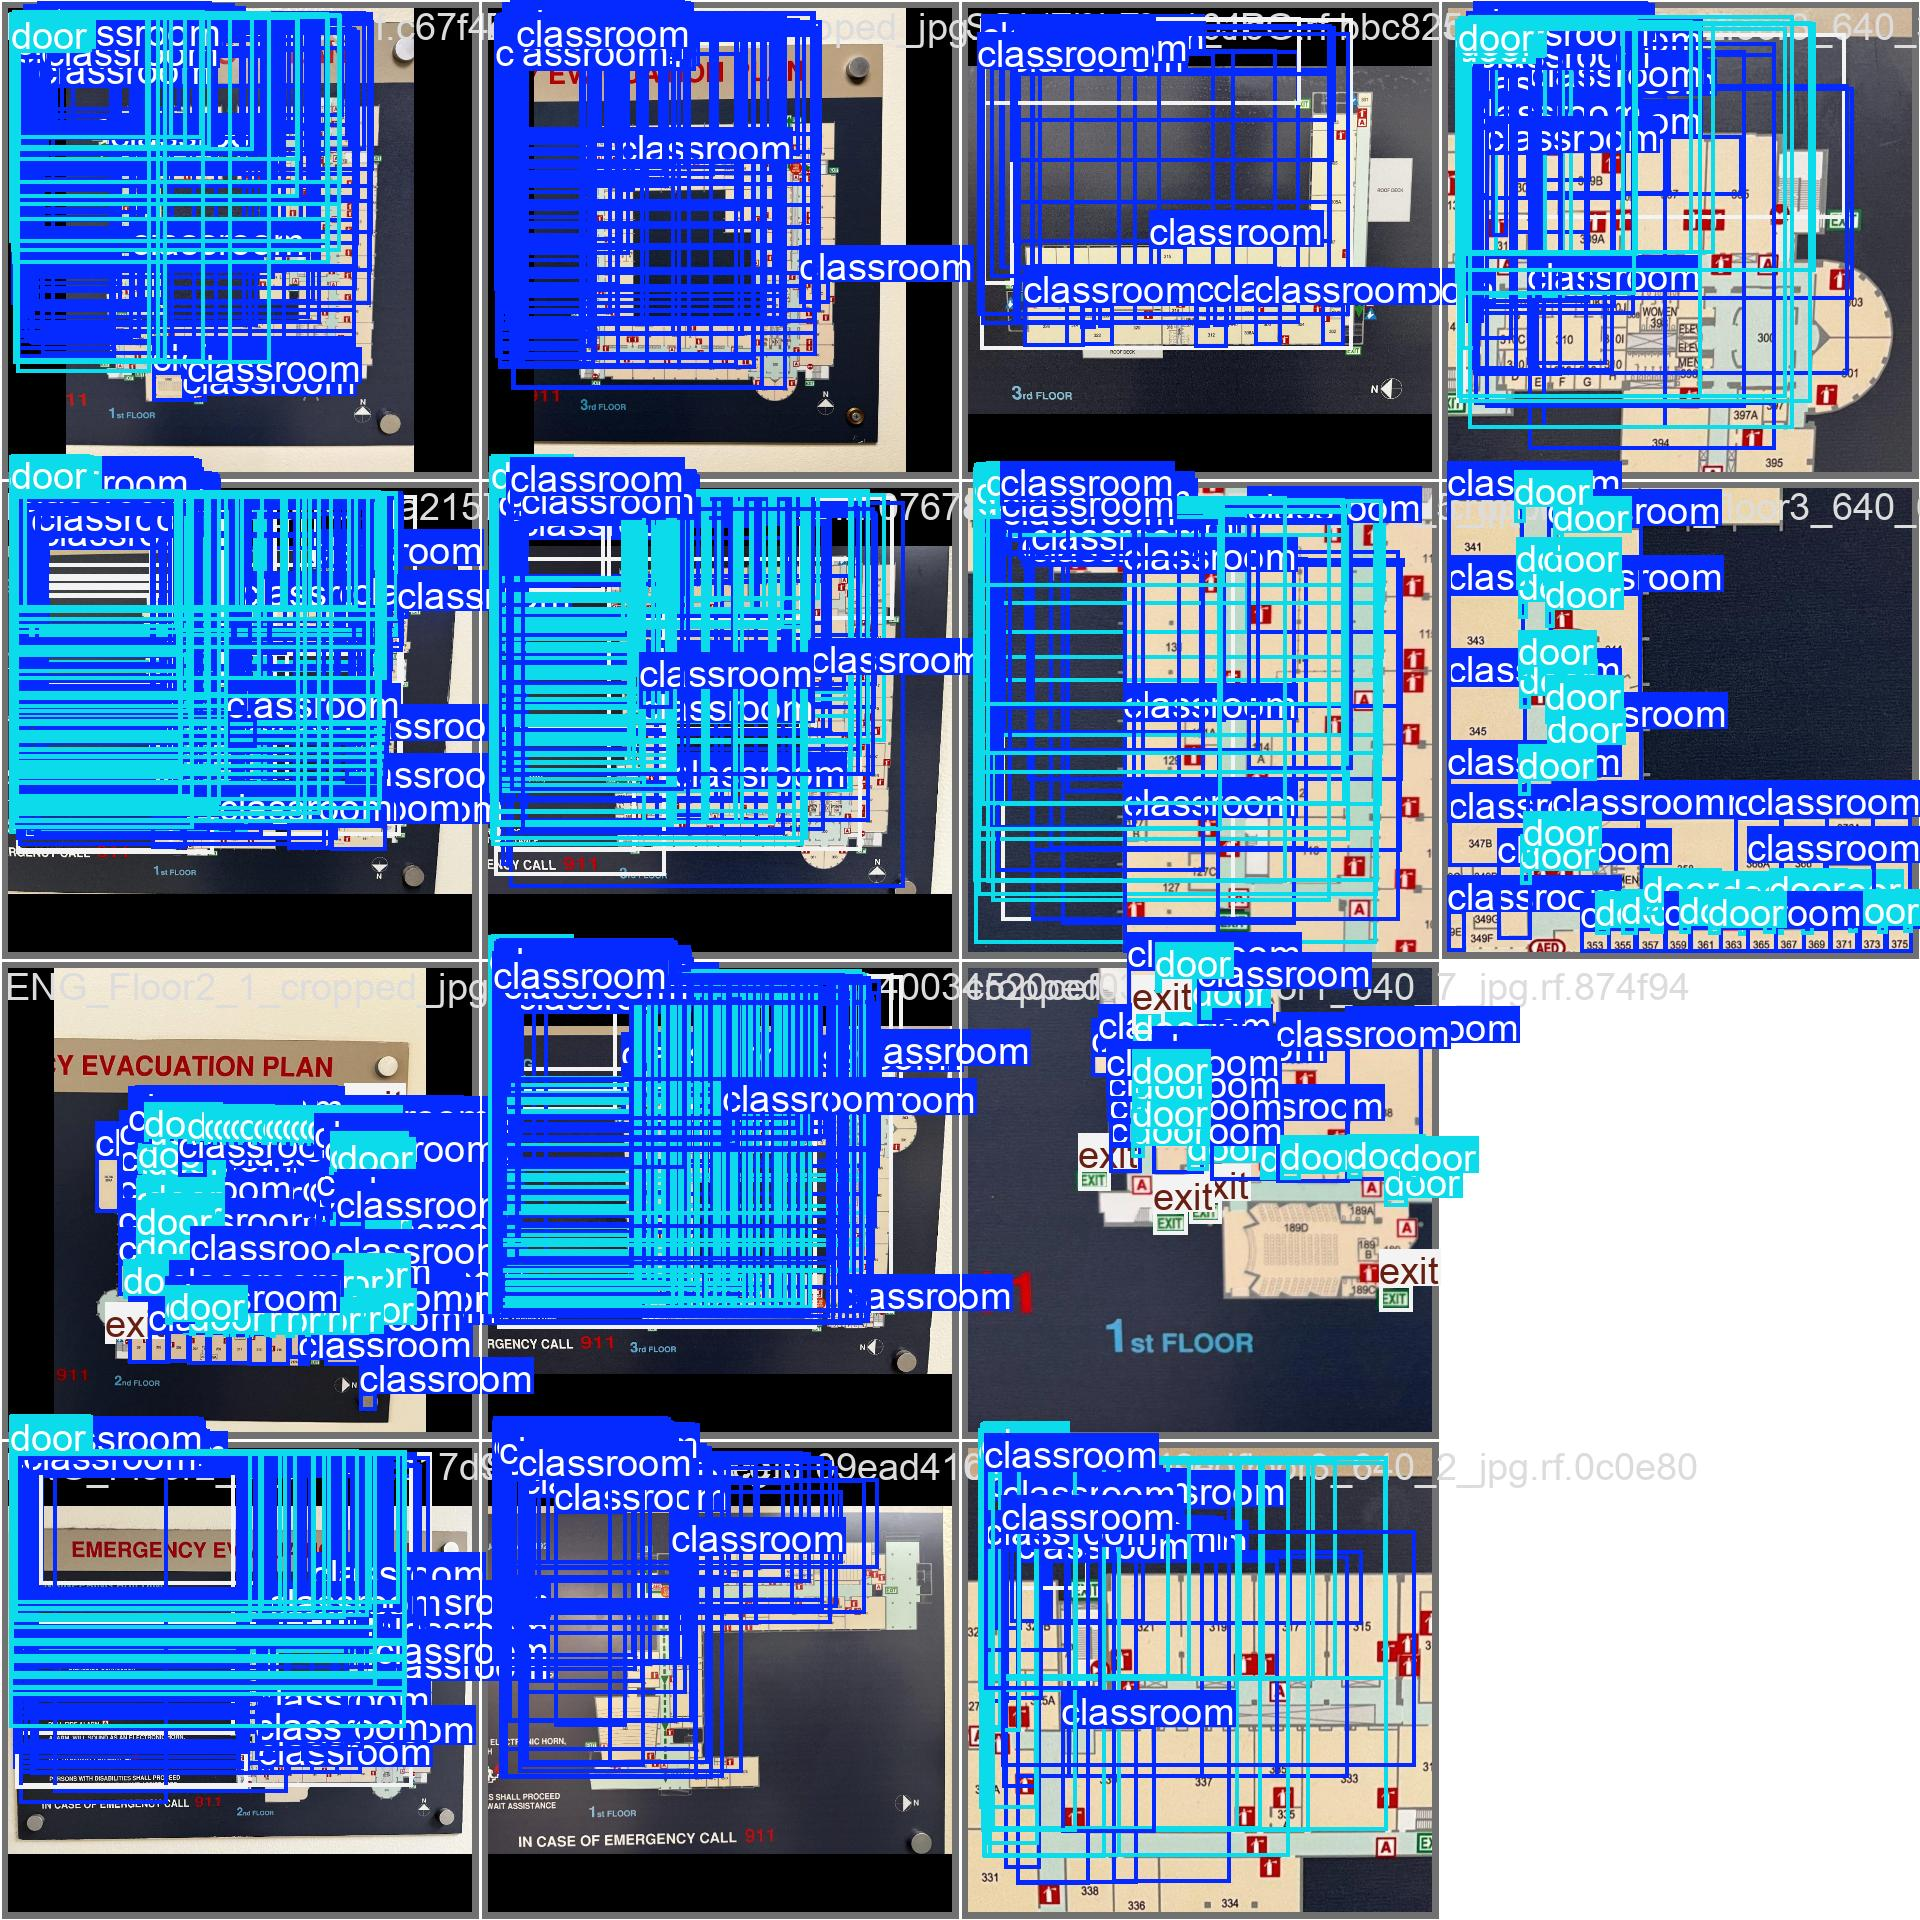

In [ ]:
IPyImage(filename=f'{HOME}/runs/detect/train5/val_batch0_labels.jpg', width=3000)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train5/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 190 layers, 56,830,489 parameters, 0 gradients, 194.4 GFLOPs
val: Scanning /content/datasets/Indoor-map-20/valid/labels.cache... 14 images, 0 backgrounds, 0 corrupt: 100% 14/14 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/Indoor-map-20/valid/images/ENG_Floor1_1_jpeg.rf.c67f4ccc428ec287d0a9a283156ff349.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1228, len(boxes) = 1502. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.38it/s]
                   all         14       1502       0.32      0.299      0.216      0.115
             classroom         14        935      0.

In [ ]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"/content/runs/detect/train5/")

View the status of your deployment at: https://app.roboflow.com/navigationofindoor/indoor-map/20
Share your model with the world at: https://universe.roboflow.com/navigationofindoor/indoor-map/model/20
